In [4]:
#!/usr/bin/env python

import sys
import os
absFilePath = os.path.abspath('attractor_switching.py')
fileDir = os.path.dirname(absFilePath)
parentDir = os.path.dirname(fileDir)

# change working directory to the project file of codes, use parentDir else
sys.path.append(parentDir+'/src')

import numpy as np
import matplotlib
import pickle
import matplotlib.pyplot as plt
from pylab import figure, cm
from matplotlib.colors import LogNorm

#####FUNC FOR LOG PLOT ################
@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

In [5]:
#PLOT   
def create_plot(data,vals,bifurcation,switchfromto):
        if switchfromto=='SB'and bifurcation=='low':
            vMin=1e-6
        else:
            vMin=1e-8

        fig, ax = plt.subplots(1, 1, figsize=(10,7))
        im1=ax.imshow(data,interpolation=None, aspect='auto', extent=[np.log10(np.min(vals)),np.log10(np.max(vals)),0,94],cmap='bone_r',origin='lower',norm=LogNorm(vmin=vMin, vmax=np.max(data)))
        ax.set_ylabel('nodes  \n(from low to high degree)',size=fs)
        ax.set_xlabel('sparsity $I_s$',size=fs)
        #ax3.set_title('Sparse control',size=fs, pad=20)
        ax.tick_params(labelsize=fs)
        cbar = fig.colorbar(im1, ax=ax)
        cbar.set_label('control signal energy',size=fs)
        cbar.ax.tick_params(labelsize=fs)
        ax.xaxis.set_ticks_position('bottom')
        ax.xaxis.set_major_formatter(fake_log)


        return fig.tight_layout()
        

low SB


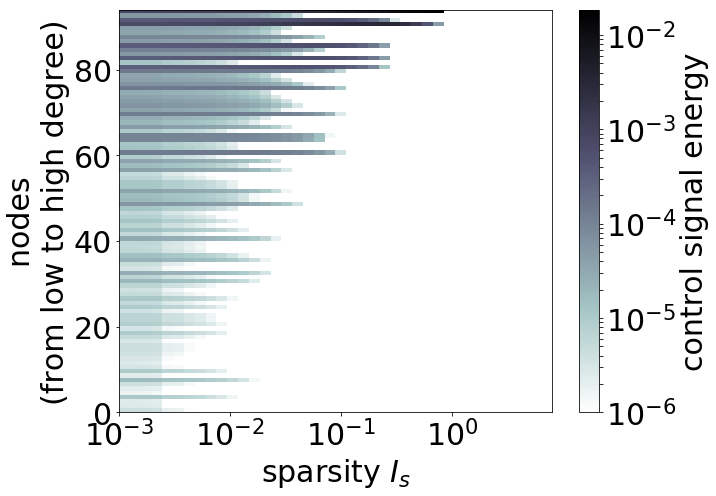

high SB


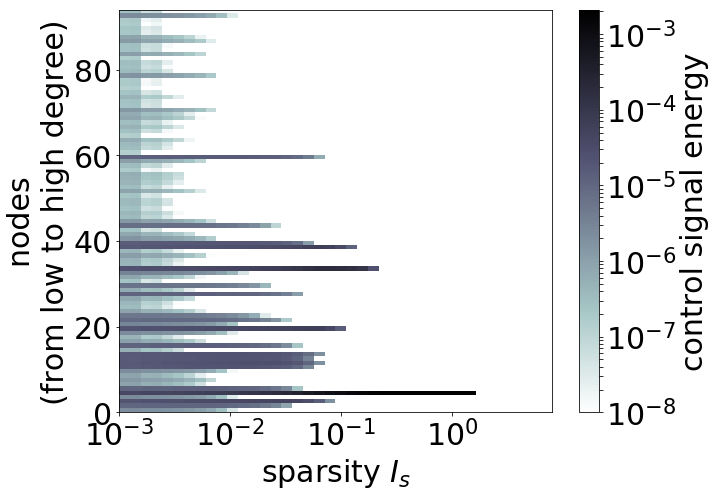

low BS


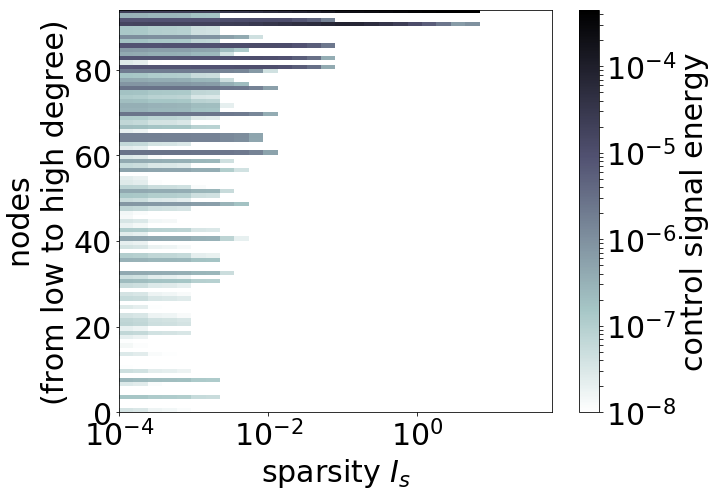

high BS


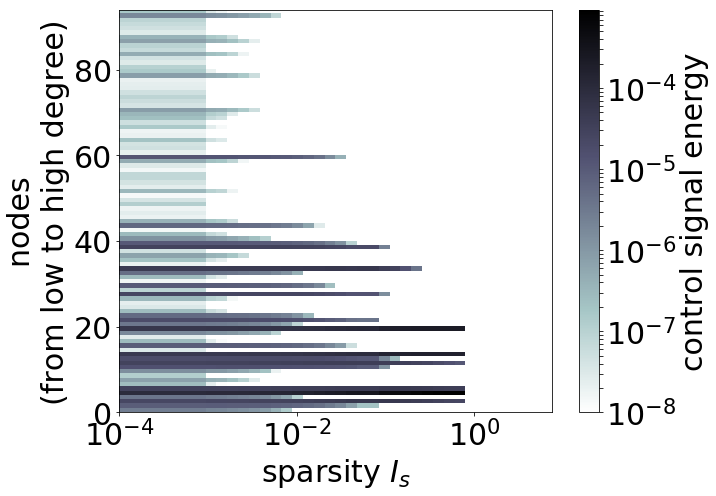

In [6]:
bifurcation_ar=(['low', 'high'])
switchfromto_ar=(['SB', 'BS'])
figures=['6a','6b','6c','6d']
fs=30
k=0
for s,switchfromto in enumerate(switchfromto_ar):
    for b,bifurcation in enumerate(bifurcation_ar):
        print(bifurcation,switchfromto)
        filename=fileDir+'/data/data_figure_5'+bifurcation+'_'+switchfromto
        with open(filename, 'rb') as pickle_file:
            data = pickle.load(pickle_file)
        
        energy=data['control_energy_sorted_by degree']
        I_s_values=data['I_s']
        create_plot(energy,I_s_values,bifurcation,switchfromto)
        plt.savefig(fileDir+'/figures/figure_'+figures[k]+'.png', bbox_inches='tight')
        plt.show()
        k+=1
